In [2]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [4]:
# 지역별 첫직장 근속년수 파일 불러오기 및 확인
employee = pd.read_excel('data/employee.xlsx')
print(employee.head())

     시도  6개월 미만  6개월~1년 미만  1~2년 미만  2~3년 미만  3~5년 미만  5년 이상  평균
0   수도권    10.6       21.5     31.7     15.8     12.9    7.6  24
1  비수도권    10.3       22.4     30.6     14.8     14.3    7.6  24
2    서울    11.4       22.8     31.6     16.3     11.8    6.0  22
3    부산     8.7       20.7     36.0     14.0     12.8    7.9  24
4    대구    11.0       26.8     29.4     16.5     14.0    2.2  20


In [12]:
# 1년 미만 근속년수 비율 계산
employee['1년미만'] = employee['6개월 미만'] +\
                    employee['6개월~1년 미만']
# 수도권 비수도권 행 삭제
df = employee.drop(employee[employee['시도'] == '수도권'].index)
df = df.drop(df[df['시도'] == '비수도권'].index) 

# 인덱스 재정렬
df.reset_index(drop=True, inplace=True)
df

,시도,6개월 미만,6개월~1년 미만,1~2년 미만,2~3년 미만,3~5년 미만,5년 이상,평균,1년미만
0,서울,11.4,22.8,31.6,16.3,11.8,6.0,22,34.2
1,부산,8.7,20.7,36.0,14.0,12.8,7.9,24,29.4
2,대구,11.0,26.8,29.4,16.5,14.0,2.2,20,37.8
3,인천,9.1,19.2,36.6,15.1,12.5,7.5,24,28.3
4,광주,13.4,26.3,28.5,16.1,11.8,3.8,20,39.7
5,대전,9.2,24.9,29.0,12.9,16.1,7.8,25,34.1
6,울산,7.5,23.7,34.4,14.0,11.8,8.6,24,31.2
7,경기,9.6,20.1,30.3,15.2,14.6,10.1,26,29.7
8,강원,11.2,20.2,36.0,13.5,10.1,9.0,24,31.4
9,충북,4.7,20.8,29.2,14.2,19.8,11.3,29,25.5


In [14]:
# 정렬한다.
df1 = df.sort_values(by='1년미만', ascending=False)
df1

,시도,6개월 미만,6개월~1년 미만,1~2년 미만,2~3년 미만,3~5년 미만,5년 이상,평균,1년미만
12,전남,10.7,37.3,25.3,13.3,4.0,9.3,20,48.0
4,광주,13.4,26.3,28.5,16.1,11.8,3.8,20,39.7
2,대구,11.0,26.8,29.4,16.5,14.0,2.2,20,37.8
0,서울,11.4,22.8,31.6,16.3,11.8,6.0,22,34.2
5,대전,9.2,24.9,29.0,12.9,16.1,7.8,25,34.1
11,전북,13.7,17.9,28.4,14.7,14.7,10.5,26,31.6
13,경북,10.7,20.8,30.9,12.8,13.4,11.4,27,31.5
8,강원,11.2,20.2,36.0,13.5,10.1,9.0,24,31.4
6,울산,7.5,23.7,34.4,14.0,11.8,8.6,24,31.2
14,경남,12.4,17.6,26.2,16.2,20.0,7.6,25,30.0


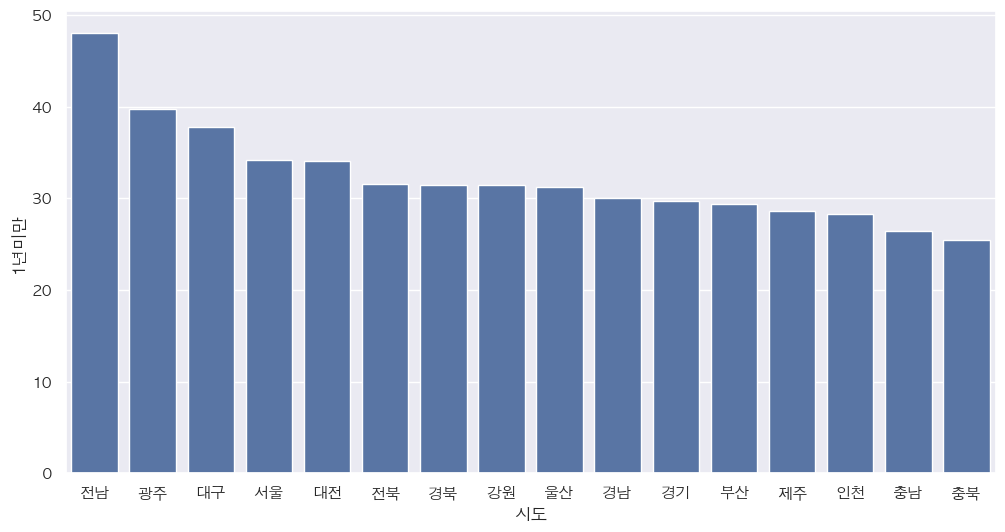

In [16]:
df2 = df1.reset_index()

sns.barplot(data=df2, x='시도', y='1년미만')
plt.show()